# Self Organizing Map

## Install MiniSom Package

In [1]:
!pip install MiniSom

### Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

## Training the SOM


In [5]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

## Visualizing the results


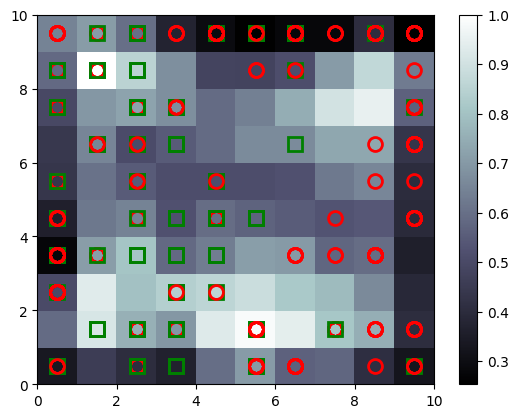

In [6]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [32]:
mappings = som.win_map(X)
frauds = []
for key, value in mappings.items():
    if np.any(np.array(value) >= 1):
        frauds.append(key)  

In [35]:
# frauds = np.concatenate((mappings[(1,8)], mappings[(5,1)], mappings[(8,7)]), axis = 0)
# frauds = sc.inverse_transform(frauds)
print(frauds)

[(0, 2), (5, 1), (9, 6), (0, 0), (3, 1), (2, 0), (4, 9), (9, 9), (5, 4), (4, 4), (6, 6), (0, 5), (6, 9), (0, 7), (3, 7), (5, 9), (9, 7), (1, 9), (8, 3), (7, 1), (1, 6), (4, 3), (2, 9), (0, 3), (2, 8), (5, 0), (3, 2), (7, 4), (2, 1), (2, 6), (1, 3), (9, 4), (1, 8), (3, 0), (2, 5), (8, 1), (2, 4), (9, 0), (9, 1), (0, 4), (3, 6), (4, 5), (1, 1), (0, 8), (3, 4), (0, 9), (8, 9), (9, 8), (2, 3), (2, 7), (7, 3), (5, 8), (4, 2), (6, 8), (3, 3), (8, 6), (3, 9), (9, 5), (6, 3), (8, 5), (7, 9), (8, 0)]


## Printing the Fraunch Clients

In [9]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15765257
15746995
15667460
15739548
15699839
15705918
15672894
15675926
15734008
15757434
15593834
15673907
15737909
15660528
15609987
15666096
15609758
15615296
15618258
